# Красивая картинка, очень неудобный график и никаких исходных данных.

In [1]:
import numpy as np
import cv2
from PIL import Image

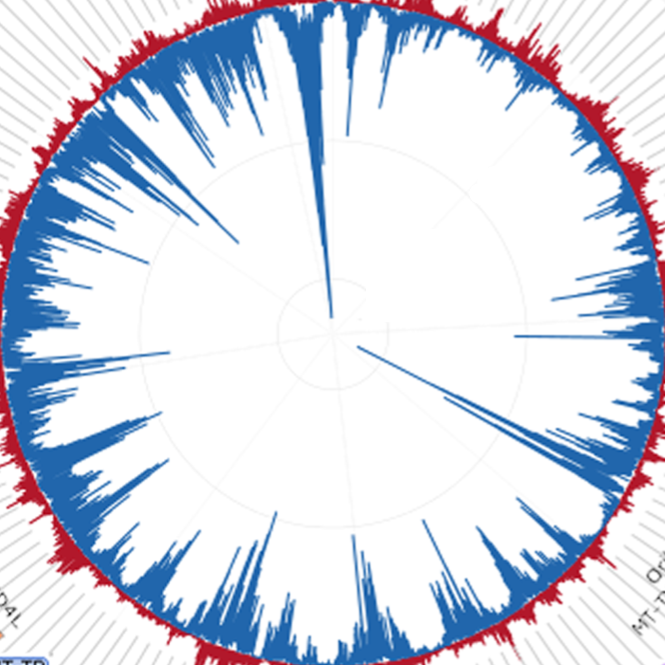

In [2]:
Image.open('Снимок экрана 2020-01-30 в 18.54.32.png')

In [3]:
image = cv2.imread('Снимок экрана 2020-01-30 в 18.54.32.png')

In [4]:
th, bw = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 127,255, cv2.THRESH_OTSU)

In [5]:
th

176.0

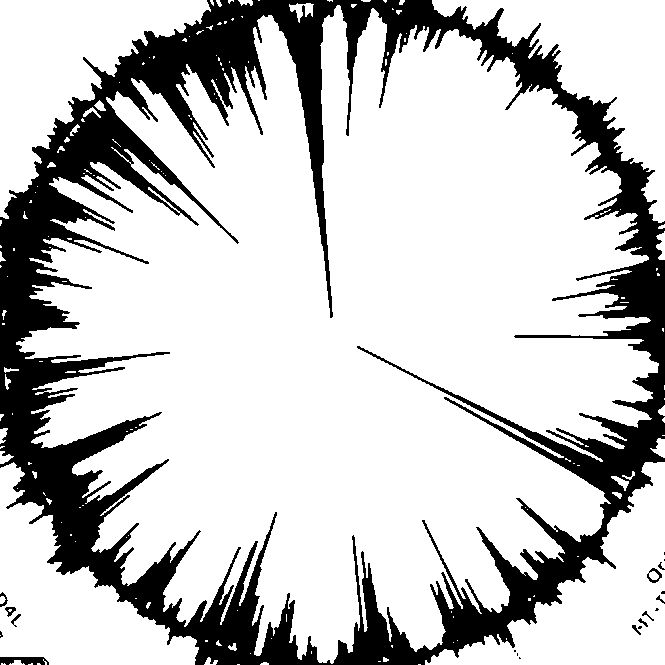

In [6]:
Image.fromarray(bw)

In [7]:
bw.shape

(665, 665)

In [8]:
circle_image = bw.copy()

In [9]:
r = 332
lines = []
for angle in np.linspace (3*np.pi/2,-np.pi/2, 8000):
    bw[
        np.clip(int(np.cos(angle)*r) + 332, 0, circle_image.shape[0]-1), 
        int(np.sin(angle) * r) + 332
    ] = 0
    lines.append(((332, 332),
                 (np.clip(int(np.cos(angle)*r) + 332, 0, circle_image.shape[0]-1), 
                int(np.sin(angle) * r) + 332)
                 ) )

In [10]:
canvas_bw = bw.copy()
for line in lines[::10]:
    for l in np.linspace(0,1, 200):
        x = np.clip( int(line[0][0] * l + line[1][0] *(1-l)), 0, canvas_bw.shape[1]-1)
        y = np.clip(int(line[0][1]*l + line[1][1] * ( 1 - l)), 0, canvas_bw.shape[0] -1)
        canvas_bw[y,x ] = 0

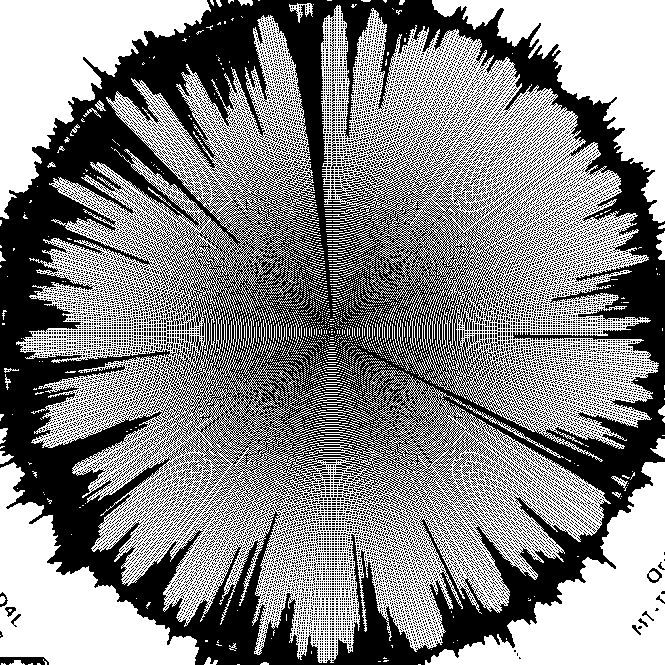

In [11]:
Image.fromarray(canvas_bw)

In [12]:
canvas_bw = bw.copy()
vals = []
for line in lines:
    for l in np.linspace(0,1, 200):
        x = np.clip( int(line[0][0] * (1-l) + line[1][0] *(l)), 0, canvas_bw.shape[1]-1)
        y = np.clip(int(line[0][1]*(1-l) + line[1][1] * (l)), 0, canvas_bw.shape[0] -1)
        if bw[y,x] == 0:
            vals.append(1 - l)
            break

In [13]:
vals = np.array(vals)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

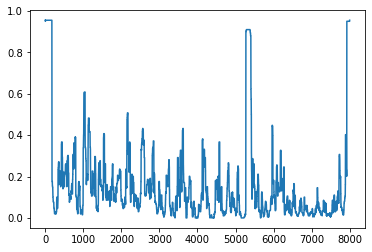

In [15]:
plt.plot(vals)

In [17]:
np.savetxt('mtdna2.csv', vals, fmt='%.5f', delimiter=' ', newline='\n')

Данные получились в "попугаях" - доли черного цвета на радиусе от центра до окружности.